In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
online_shop = pd.read_csv('Online-shopping.csv')
online_shop2 = online_shop.drop(['Unnamed: 0','Date'], axis = 1)
online_shop3 = online_shop2.dropna(axis=0)
online_shop3.head()


,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,4500.0,2424.5,1,ELEC10,10.0
1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,4500.0,2424.5,1,ELEC10,10.0
2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,Not Used,0.1,4500.0,2424.5,1,ELEC10,10.0
3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,Clicked,0.1,4500.0,2424.5,1,ELEC10,10.0
4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Clicked,0.1,4500.0,2424.5,1,ELEC10,10.0


In [3]:
online_shop3['TotalPrice'] = online_shop3['Quantity']*online_shop3['Avg_Price']
online_shop3.dtypes

C:\Users\User\AppData\Local\Temp\ipykernel_10320\3270756734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_shop3['TotalPrice'] = online_shop3['Quantity']*online_shop3['Avg_Price']


CustomerID             float64
Gender                  object
Location                object
Tenure_Months          float64
Transaction_ID         float64
Transaction_Date        object
Product_SKU             object
Product_Description     object
Product_Category        object
Quantity               float64
Avg_Price              float64
Delivery_Charges       float64
Coupon_Status           object
GST                    float64
Offline_Spend          float64
Online_Spend           float64
Month                    int64
Coupon_Code             object
Discount_pct           float64
TotalPrice             float64
dtype: object

In [4]:
#we convert the date to datetime type
online_shop3['Transaction_Date'] = pd.to_datetime(online_shop3['Transaction_Date'])
online_shop3.dtypes

C:\Users\User\AppData\Local\Temp\ipykernel_10320\3748928104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_shop3['Transaction_Date'] = pd.to_datetime(online_shop3['Transaction_Date'])


CustomerID                    float64
Gender                         object
Location                       object
Tenure_Months                 float64
Transaction_ID                float64
Transaction_Date       datetime64[ns]
Product_SKU                    object
Product_Description            object
Product_Category               object
Quantity                      float64
Avg_Price                     float64
Delivery_Charges              float64
Coupon_Status                  object
GST                           float64
Offline_Spend                 float64
Online_Spend                  float64
Month                           int64
Coupon_Code                    object
Discount_pct                  float64
TotalPrice                    float64
dtype: object

# 1.Plot a time series plot to visualize the trend

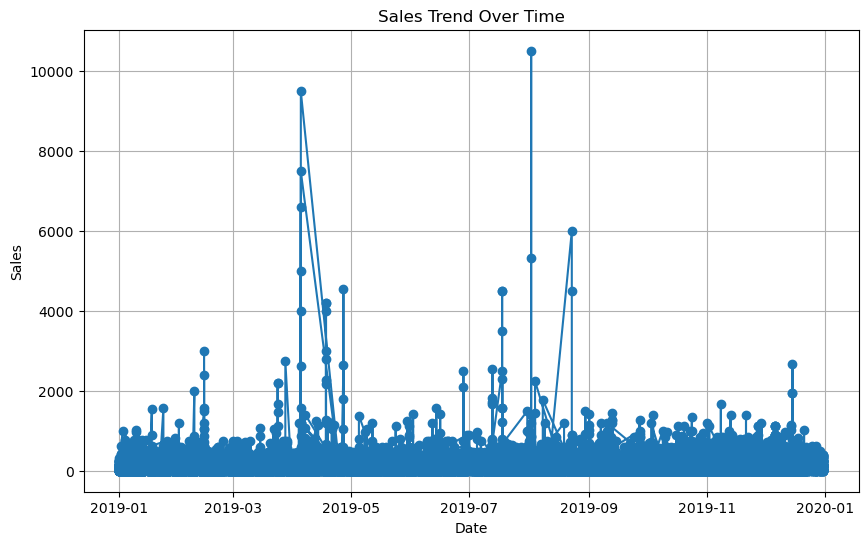

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(online_shop3['Transaction_Date'], online_shop3['TotalPrice'], marker='o', linestyle='-')

plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

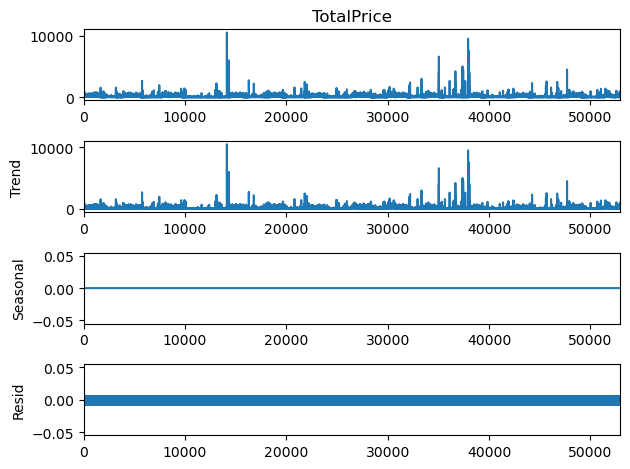

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(online_shop3['TotalPrice'], model='additive', period=1)
result.plot()
plt.show()